In [22]:
#Data Libraries
import pandas as pd
from pandas import Series, DataFrame
import numpy as np

In [23]:
#Vis Libraries
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [24]:
from pandas_datareader import data

In [25]:
from datetime import datetime

In [26]:
from __future__ import division

In [27]:
#Tech stocks will be Apple, Google, Microsoft, and Amazon
tech_list = ['AAPL','GOOG','MSFT','AMZN']

In [28]:
end = datetime.now()
#Start date is today's year minus one year.. one year ago*
start = datetime(end.year-1, end.month, end.day)

In [29]:
#Globals takes our stock variable and makes it a global variable
#DataReader changed to data.DataReader
for stock in tech_list:
    globals()[stock] = data.DataReader(stock,'yahoo',start,end)

In [32]:
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,254.000000,254.000000,254.000000,254.000000,2.540000e+02,254.000000
mean,281.240945,274.668150,277.614027,278.217558,3.513356e+07,277.104270
std,51.101658,49.983073,50.532300,50.592789,1.688747e+07,51.150090
min,198.070007,192.580002,195.410004,193.339996,1.165440e+07,191.059784
25%,238.845005,234.392502,236.367500,236.260006,2.396200e+07,234.360683
50%,279.165009,270.149994,274.739990,275.089996,3.052870e+07,274.022491
75%,319.177505,313.070000,316.047508,316.820007,4.057110e+07,315.900604
max,399.820007,386.970001,396.690002,393.429993,1.067212e+08,393.429993


In [33]:
#Using adj close price for data analysis, common.
#254 rows of data
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 254 entries, 2019-07-23 to 2020-07-23
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       254 non-null    float64
 1   Low        254 non-null    float64
 2   Open       254 non-null    float64
 3   Close      254 non-null    float64
 4   Volume     254 non-null    float64
 5   Adj Close  254 non-null    float64
dtypes: float64(6)
memory usage: 13.9 KB


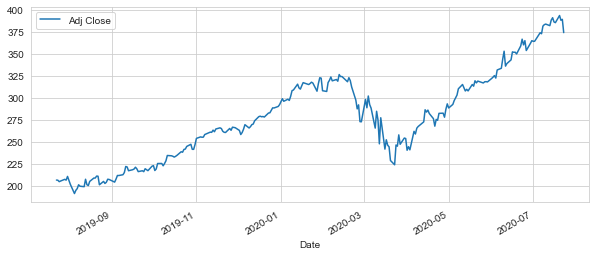

In [34]:
#Map Adj Close over one year in one line
AAPL['Adj Close'].plot(legend=True, figsize=(10,4))

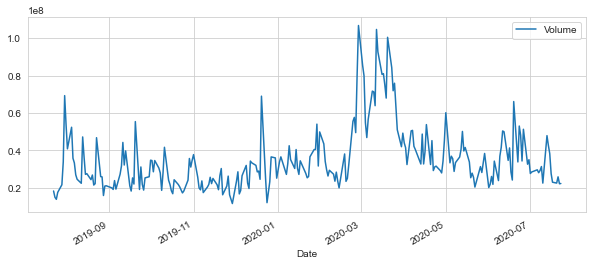

In [35]:
#Plot total volume of stock traded each day over a year
AAPL['Volume'].plot(legend=True,figsize=(10,4))

In [47]:
#Will calculate several moving averages
#List of MA days, 10 20 and 50 days
#in For Loop, we will create a column_name
#Labled it the MA for string days
#Then created a new column in AAPL dataframe called the column_name
#And this column will take the rolling mean of the Adj closing price
ma_day = [10,20,50]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    
    AAPL[column_name] = pd.DataFrame.rolling(AAPL['Adj Close'],ma).mean()
    
#Ran into rolling mean error, may be outdated.
#Had to call the DataFrame module
#Put .mean() at the end.
#Seems to work, don't know exactly why :\. 

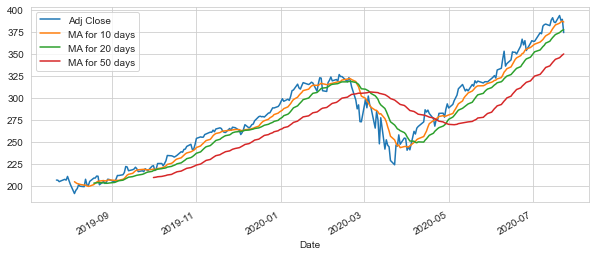

In [48]:
#Pass a list of column names, plot them all, set subplot to False to create just one plot

AAPL[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(10,4))

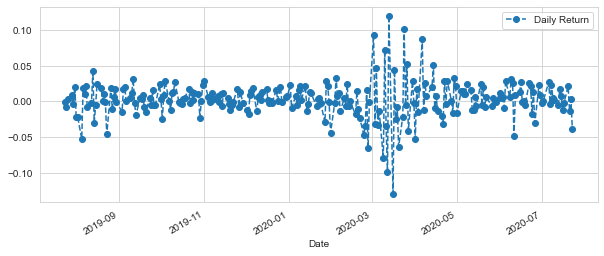

In [49]:
#Take a look at daily returns
#Analyze daily returns and risk of stock
#Look at daily changes
#Create a new column called Daily Return, and it will be the pct change of Adj Close

AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()

AAPL['Daily Return'].plot(figsize=(10,4),legend=True,linestyle='--',marker='o')

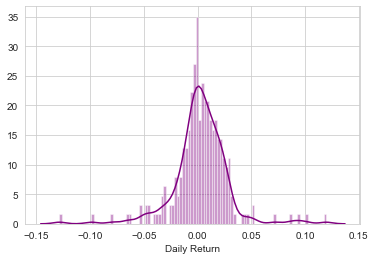

In [50]:
#Let's look at the average daily return
#over the past year using a histogram & sns -- also KDE plot
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')

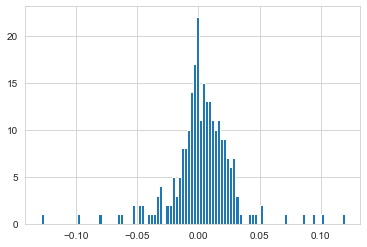

In [52]:
AAPL['Daily Return'].hist(bins=100)

In [61]:
#Let's analyze the returns on all the stocks on our list
#Create a dataframe
#DataReader has changed to data.DataReader

closing_df = data.DataReader(tech_list, 'yahoo',start,end)['Adj Close']

In [62]:
closing_df.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2019-07-23,206.376984,1146.209961,137.596817,1994.489990
2019-07-24,206.209015,1137.810059,139.009445,2000.810059
2019-07-25,204.578476,1132.119995,138.485886,1973.819946
2019-07-26,205.289978,1250.410034,139.621902,1943.050049
2019-07-29,207.207077,1239.410034,139.315674,1912.449951


In [63]:
tech_rets = closing_df.pct_change()

In [64]:
tech_rets.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2019-07-23,NaN,NaN,NaN,NaN
2019-07-24,-0.000814,-0.007328,0.010266,0.003169
2019-07-25,-0.007907,-0.005001,-0.003766,-0.013490
2019-07-26,0.003478,0.104485,0.008203,-0.015589
2019-07-29,0.009338,-0.008797,-0.002193,-0.015748


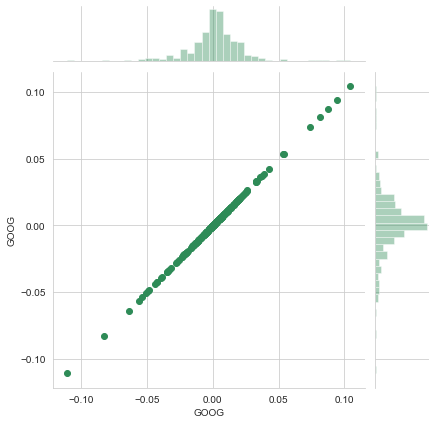

In [65]:
#The line has a pearson r value of 1, because we're mapping
#google against itself.
sns.jointplot('GOOG','GOOG',tech_rets,kind='scatter',color='seagreen')

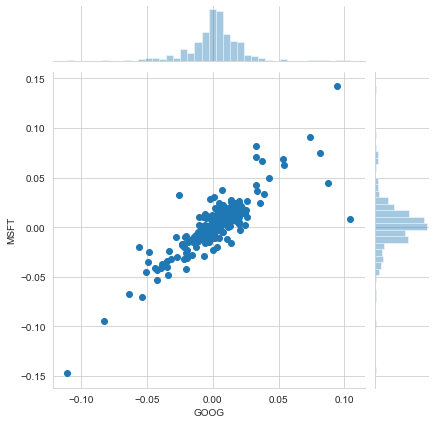

In [66]:
#Next, let's look at the corelation between GOOG & MSFT returns
#We can see a good corelation, near the .8 range.
sns.jointplot('GOOG','MSFT',tech_rets,kind='scatter')

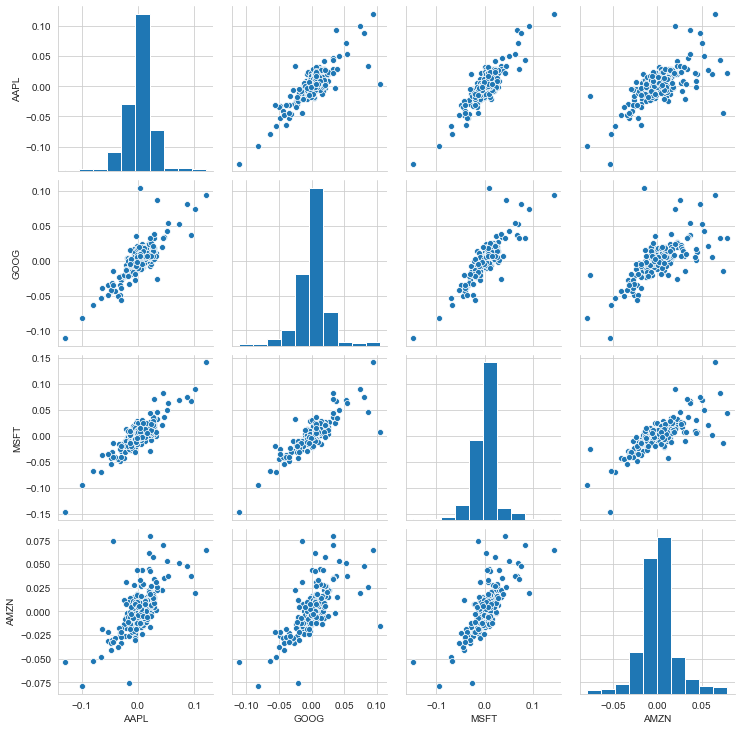

In [67]:
#Let's create a pairplot
#Dropping NA values of unclosed markets
sns.pairplot(tech_rets.dropna())

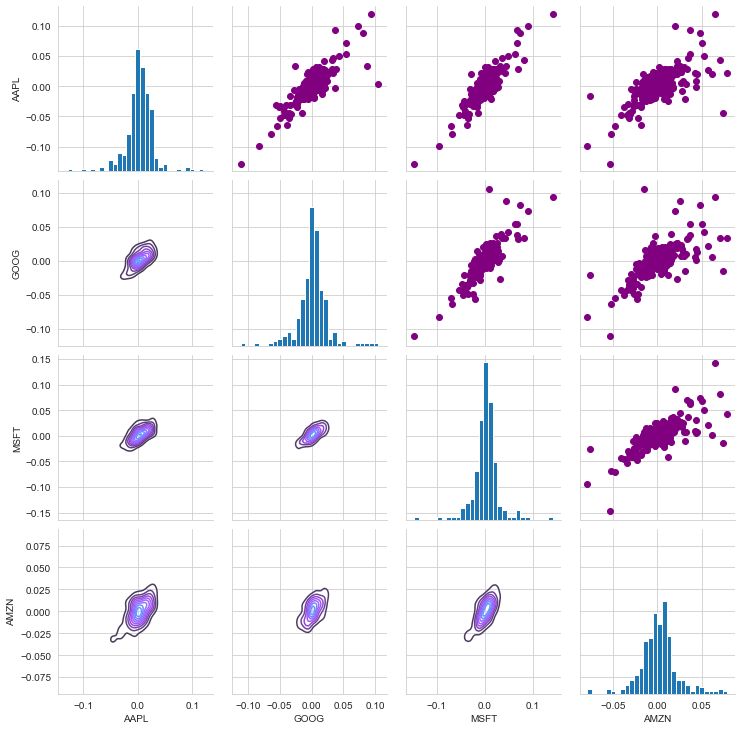

In [70]:
returns_fig = sns.PairGrid(tech_rets.dropna())

#Pass 3 methods on it
#Map_Upper - decide upper triangle to look like 
#Map_lower - KDE plots 
#Map_Diag - histogram 30 bins
returns_fig.map_upper(plt.scatter, color='purple')
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')
returns_fig.map_diag(plt.hist,bins=30)

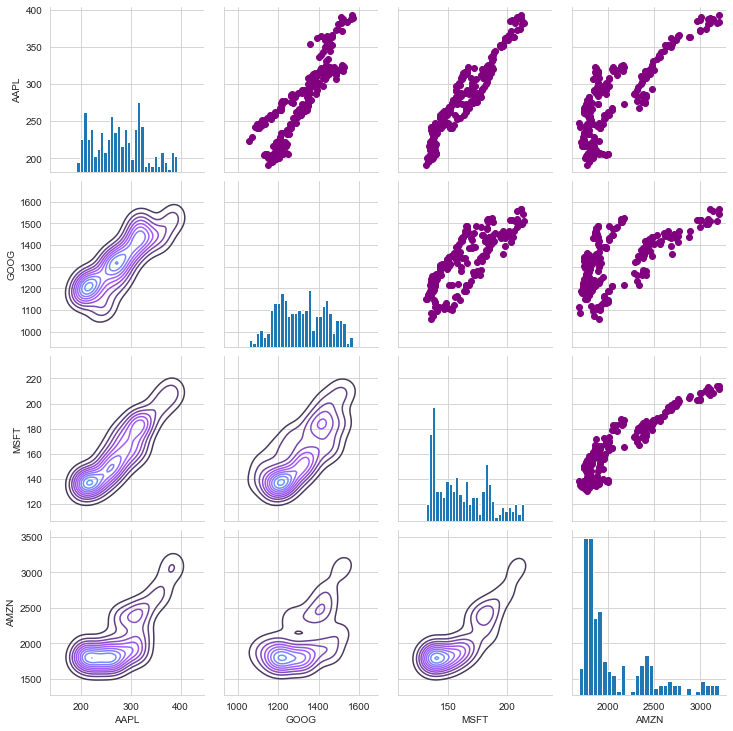

In [71]:
#Now, instead of returns, we'll look at closing prices
#Apple & MSFT, and Apple & GOOG look interesting 7/23/2020
returns_fig = sns.PairGrid(closing_df.dropna())

returns_fig.map_upper(plt.scatter, color='purple')
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')
returns_fig.map_diag(plt.hist,bins=30)

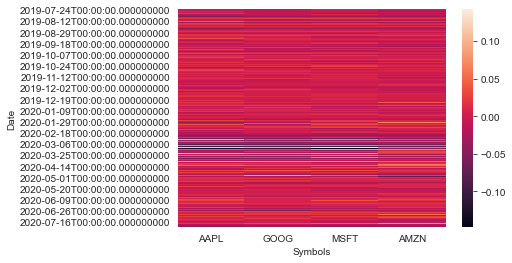

In [85]:
#module 'seaborn' has no attribute 'corrplot'
#Corrplot was depreciated to heatmap.
#annot=true is really ugly, too many numbers.
#Gives a heatmap of 4x365.. looks a bit ugly.
sns.heatmap(tech_rets.dropna())

In [86]:
#Moving onto Risk Analysis
#Expected return against Std of returns

rets = tech_rets.dropna()

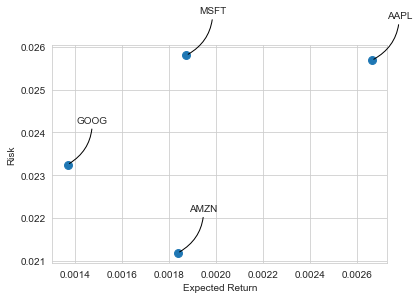

In [98]:
#Area is used to define area of circles for scatter plot
#Had to add color to arrowprops for proper visualization
#7/23/2020 - Apple high risk high reward
area = np.pi*20

plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected Return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label,
        xy = (x, y), xytext = (40,40),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', color='black', connectionstyle ='arc3,rad=-0.3'))

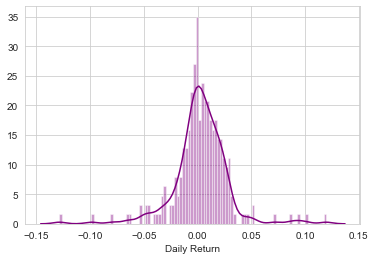

In [100]:
#Value at risk using Bootstrap Method, quantiles

sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')

In [101]:
rets.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2019-07-24,-0.000814,-0.007328,0.010266,0.003169
2019-07-25,-0.007907,-0.005001,-0.003766,-0.013490
2019-07-26,0.003478,0.104485,0.008203,-0.015589
2019-07-29,0.009338,-0.008797,-0.002193,-0.015748
2019-07-30,-0.004292,-0.011514,-0.004822,-0.007279


In [102]:
#This number means there's 95% confidence that your worst daily loss
#will not exceed the given percent. (7/23/2020 ~3.7%)
rets['AAPL'].quantile(0.05)

-0.0373992092406016

In [103]:
#Value at Risk using the Monte Carlo method
#Allows us to run many trials with different market conditions
#Aggregation of all trials helps describe risk.
#Formula is roughly
#ChangeInStockPrice = CurrentStockPrice(Drift+Shock)

days = 365
dt = 1/days
mu = rets.mean()['GOOG']
sigma = rets.std()['GOOG']

In [104]:
#Variables created
#Function takes starting price in number of days
#and uses sigma and mu to (form?) daily returns(?) (hard to hear)
#array of zeros with same length as days
#shock & drift are arrays

#1) We have the stock monte carlo function, which takes in the given variables
#2) We defined the given variables, by creating arrays of zeros.
#3) For every day we go along, we calc a shock term grabbed from a random
#   distribution with scale being equal to sigma*np.sqrt(dt), found from
#   investopedia equation.
#4) Drift term - mu times delta t from equation
#5) Current price calculated using simple algebra.

def stock_monte_carlo(start_price,days,mu,sigma):
    price=np.zeros(days)
    price[0] = start_price
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    for x in range(1,days):
        
        shock[x] = np.random.normal(loc=mu*dt, scale=sigma*np.sqrt(dt))
        
        drift[x] = mu * dt
        
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
        
    return price

In [105]:
GOOG.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-07-23,1146.900024,1131.800049,1144.000000,1146.209961,1093700,1146.209961
2019-07-24,1144.000000,1126.989990,1131.900024,1137.810059,1589800,1137.810059
2019-07-25,1141.699951,1120.920044,1137.819946,1132.119995,2209800,1132.119995
2019-07-26,1265.550049,1224.000000,1224.040039,1250.410034,4805800,1250.410034
2019-07-29,1247.369995,1228.229980,1241.050049,1239.410034,2223700,1239.410034


Text(0.5, 1.0, 'Monte Carlo Analysis for Google')

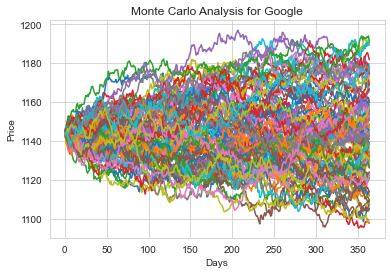

In [106]:
#set start price to open price 7/23/2020 = 1144.0000
start_price = 1144.0000
#run MonteCarlo 100 times
for run in range(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
    
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo Analysis for Google')

In [107]:
#MonteCarlo looks crazy, but let's try to make sense of it.
#10,000 runs, for every run, that point in that simulation
#is going to be defined as that end point
#Gathering array of endpoint of 10,000 price points
runs = 10000

simulations = np.zeros(runs)

for run in range(runs):
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]

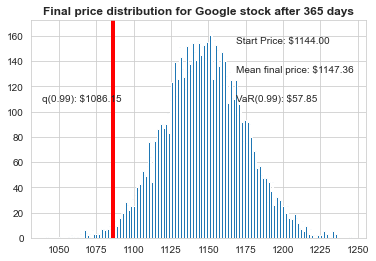

In [108]:
#Now that we have an array of simulations
#We can plot a histogram and use quantile to define our risk for this stock
#This uses numpy to define Q as the one percent quantile
q = np.percentile(simulations,1)

#10,000 runs means a lot of bins.
plt.hist(simulations,bins=200)

#Starting Price
plt.figtext(0.6,0.8, s="Start Price: $%.2f" %start_price)
#Mean ending price
plt.figtext(0.6, 0.7, "Mean final price: $%.2f" %simulations.mean())
#Variance of the price (within 99% confidence interval)
plt.figtext(0.6,0.6,"VaR(0.99): $%.2f" % (start_price - q,))
#Display 1% quantile
plt.figtext(0.15,0.6, "q(0.99): $%.2f" %q)
#Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')
#Title
plt.title(u"Final price distribution for Google stock after %s days" %days, weight='bold');

#This gives us a histogram of all the final prices.
#Red line was plotted at 1% quantile result.

In [ ]:
#1) Estimate the values at risk, using both methods we learned in this
#   project for a stock not related to technology
#2) Build a practice portfolio and see how well you can predict the risk
#   values of real stocks (?)
#3) Look further into correlation of two stocks and see if that gives you
#   any insight into future possible stock prices